In [4]:
import pandas as pd
import re
from unidecode import unidecode
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

IndexError: list index out of range

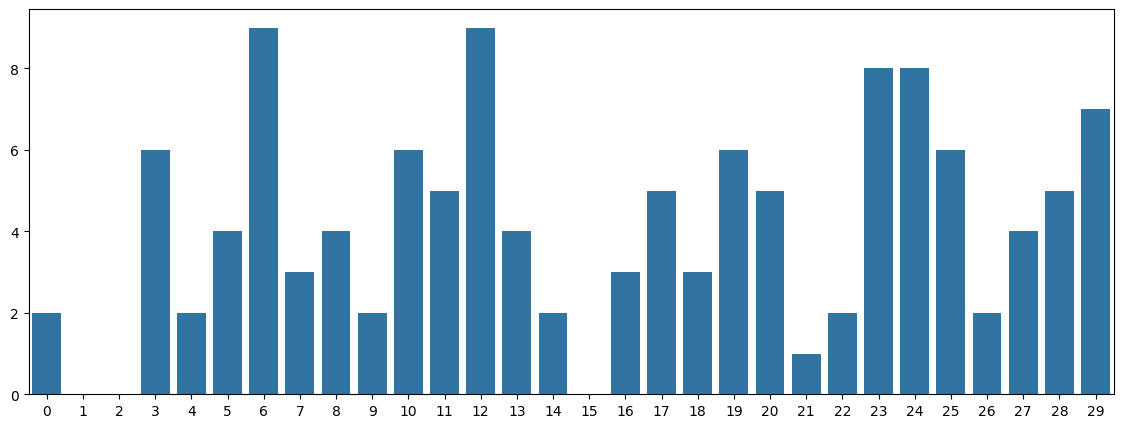

In [62]:
np.random.seed(13)
arr = np.random.randint(0, 10, 30)

fig, ax = plt.subplots(figsize=(14, 5))
barplot = sns.barplot(arr)

arr = [1,2,2]
arr = list(arr)

pos = {}

for i in range(len(arr)):
    if i == 0 and arr[0] < arr[1]:
        pos[0] = 1
    elif i == len(arr)-1 and arr[i] < arr[i-1]:
        pos[i] = 1
    elif arr[i] <= arr[i-1] and arr[i] <= arr[i+1]:
        pos[i] = 1

remain = [i for i in range(len(arr)) if i not in list(pos.keys())]
print(remain)
# for i in [i for i in range(len(arr)-1) if i not in list(pos.keys()) if i > list(pos.keys())[0]]:
for i in remain:
    if i+1 < len(arr) and arr[i+1] >= arr[i] >= arr[i-1]:
        pos[i] = pos[i-1] + 1
    # if i+2 < len(arr) and arr[i] > arr[i-1] and arr[i] >= arr[i+1]:
    #     pos[i] = pos[i-1] + 1
    

remain = [i for i in range(len(arr)-1) if i not in list(pos.keys())]
for i in sorted(remain, reverse=True):
    if arr[i-1] >= arr[i] >= arr[i+1]:
        pos[i] = pos[i+1] + 1

remain = [i for i in range(len(arr)) if i not in list(pos.keys())]
for i in remain:
    if i == 0:
        pos[i] = pos[i+1] + 1
    elif i == len(arr)-1:
        pos[i] = pos[i-1] + 1
    else:
        pos[i] = max(pos[i-1], pos[i+1]) + 1
        

    
for idx, p in enumerate(barplot.patches):
    if idx in pos:  # Only add text if the index exists in value_dict
        ax.text(
            p.get_x() + p.get_width() / 2,  # X position (center of bar)
            p.get_height(),  # Y position (top of bar)
            str(pos[idx]),  # Text (value from dictionary)
            ha='center', va='bottom', fontsize=12, color='black'
        )

In [57]:
sum(list(pos.values()))

61

In [19]:
dict(sorted(pos.items(), key=lambda x: x[0]))

{2: 1,
 3: 2,
 5: 1,
 6: 2,
 7: 3,
 9: 1,
 14: 1,
 15: 2,
 16: 3,
 18: 1,
 21: 1,
 22: 2,
 25: 1,
 27: 1,
 29: 1}